<a href="https://colab.research.google.com/github/wlabunski/Shuri-or-Shuri/blob/main/Shuri_or_Shuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow==1.13.1
import tensorflow as tf

import os
import pandas as pd

from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation
from tensorflow.python.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ModelCheckpoint,LearningRateScheduler
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.utils import plot_model


from sklearn.model_selection import train_test_split, ShuffleSplit

import matplotlib.pyplot as plt

from PIL import Image

import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
print(tf.__version__)

1.15.0-rc3


In [ ]:

path_main = '/content/drive/My Drive/deep_learning_tests/shuri/shuri'
#path_letitia = 'D:/shuri/do nauki/Letitia'
#path_kot = 'D:/shuri/do nauki/Kot'
train_path = os.path.join(path_main, 'train_folder')
test_path = os.path.join(path_main, 'test_folder')


train_path_kot = os.path.join(train_path, 'train_kot')
train_path_letitia = os.path.join(train_path, 'train_letitia')

test_path_kot = os.path.join(test_path, 'test_kot')
test_path_letitia = os.path.join(test_path, 'test_letitia')
# train_path_letitia = os.path.join(path_letitia, 'train_letitia')
# test_path_letitia = os.path.join(path_letitia, 'test_letitia')

# train_path_kot = os.path.join(path_kot, 'train_kot')
# test_path_kot = os.path.join(path_kot, 'test_kot')

In [ ]:
def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:25]
  
  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx+1)
    
    img = plt.imread(img_path)
    plt.imshow(img)
  
  plt.tight_layout()

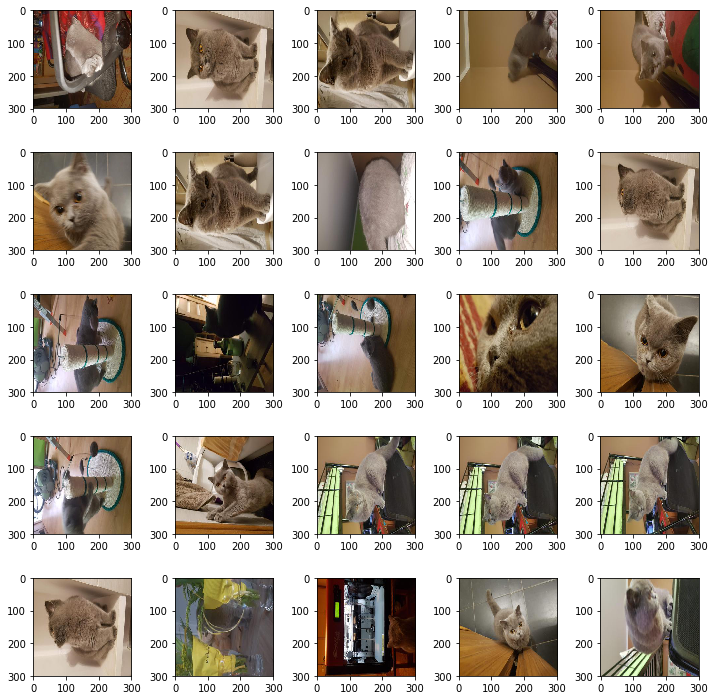

In [ ]:
plot_images(train_path_kot)

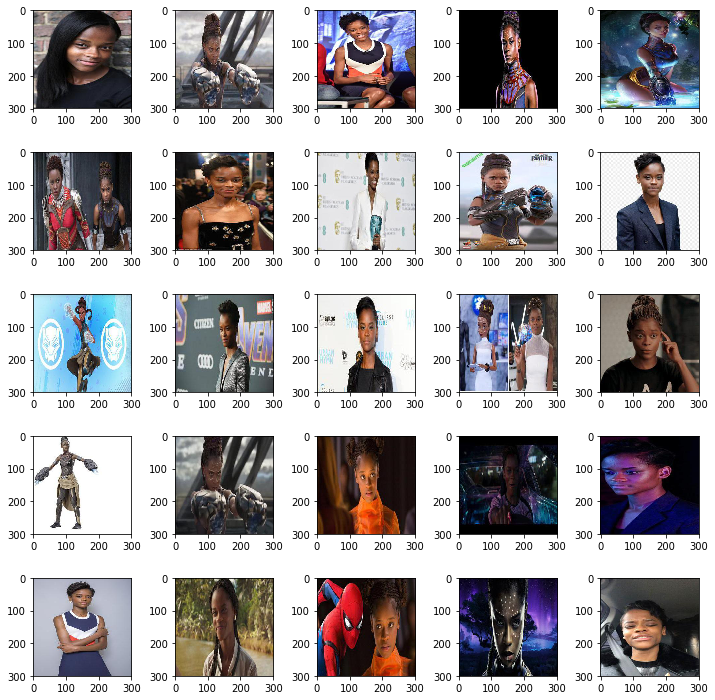

In [ ]:
plot_images(train_path_letitia)

In [ ]:
#jakaś tam sieć

input_shape = (300, 300, 3)
model = Sequential([
    Conv2D(32, (3,3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(32, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
    
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.train.AdamOptimizer(), metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d

In [ ]:
mod_input = model.input

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary')

Found 1087 images belonging to 2 classes.
Found 270 images belonging to 2 classes.


In [ ]:
# TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
# tf.logging.set_verbosity(tf.logging.INFO)

In [ ]:
# tpu_model = tf.contrib.tpu.keras_to_tpu_model(
#     model,
#     strategy=tf.contrib.tpu.TPUDistributionStrategy(
#         tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Epoch 1/20
Epoch 1/20
50/20 - 4s - loss: 0.3372 - acc: 0.8680
20/20 - 75s - loss: 0.4010 - acc: 0.8600 - val_loss: 0.3225 - val_acc: 0.8680
Epoch 2/20
Epoch 1/20
50/20 - 4s - loss: 0.2234 - acc: 0.9247
20/20 - 28s - loss: 0.2793 - acc: 0.8915 - val_loss: 0.2227 - val_acc: 0.9247
Epoch 3/20
Epoch 1/20
50/20 - 5s - loss: 0.1399 - acc: 0.9392
20/20 - 28s - loss: 0.3135 - acc: 0.8800 - val_loss: 0.1830 - val_acc: 0.9392
Epoch 4/20
Epoch 1/20
50/20 - 5s - loss: 0.1842 - acc: 0.9216
20/20 - 6s - loss: 0.2436 - acc: 0.9070 - val_loss: 0.1920 - val_acc: 0.9216
Epoch 5/20
Epoch 1/20
50/20 - 5s - loss: 0.1332 - acc: 0.9309
20/20 - 7s - loss: 0.2618 - acc: 0.9025 - val_loss: 0.1792 - val_acc: 0.9309
Epoch 6/20
Epoch 1/20
50/20 - 5s - loss: 0.3451 - acc: 0.9010
20/20 - 7s - loss: 0.1892 - acc: 0.9250 - val_loss: 0.2794 - val_acc: 0.9010
Epoch 7/20
Epoch 1/20
50/20 - 4s - loss: 0.2157 - acc: 0.9423
20/20 - 6s - loss: 0.1848 - acc: 0.9225 - val_loss: 0.1774 - val_acc: 0.9423
Epoch 8/20
Epoch 1/20
50

In [ ]:
model.evaluate(validation_generator) #val_acc: 0.8722

14/14 [==============================] - 1s 88ms/step - loss: 0.4044 - acc: 0.8370


[0.40438996468271526, 0.837037]

In [ ]:
img_kot = os.path.join(test_path_kot, 'kot_28.jpg')
img_letitia = os.path.join(test_path_letitia, 'letitia_42.jpg')

In [ ]:
def predict_shuri(image_path):
  imge = plt.imread(image_path)
  plt.imshow(imge)

  img = image.load_img(image_path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict_classes(images, batch_size=10)
  if classes[0][0] == 0:
    print("To jest kot!")
  else:
    print("To jest Letitia!")


To jest Letitia!


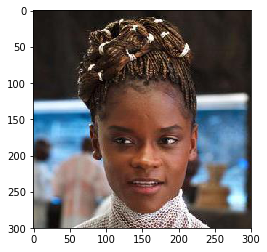

In [ ]:
predict_shuri(img_letitia)

In [ ]:
#model.save('model_shuri.hdf5')

In [ ]:
plot_model(model, to_file='model.png')

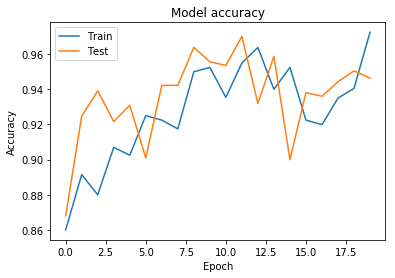

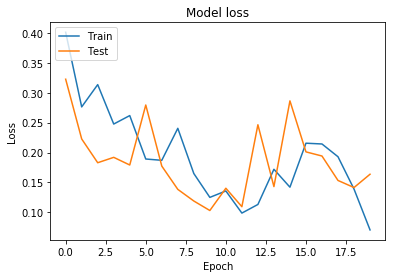

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
img_k = image.load_img(img_letitia, target_size=(300, 300))
img_arr = np.array(img_k)
img_arr = np.expand_dims(img_arr, axis=0)
images = np.vstack([img_arr])


In [ ]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:8]]



In [ ]:
activation_model = Model(inputs=model.input, outputs=layer_outputs)

TypeError: ignored

In [ ]:
activations = activation_model.predict(images)

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

NameError: ignored

In [ ]:
model.layers[:-1]# Droping The Last Dense Layer

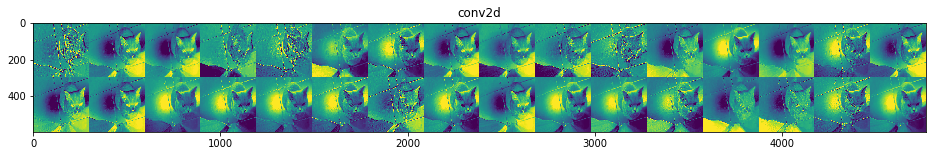

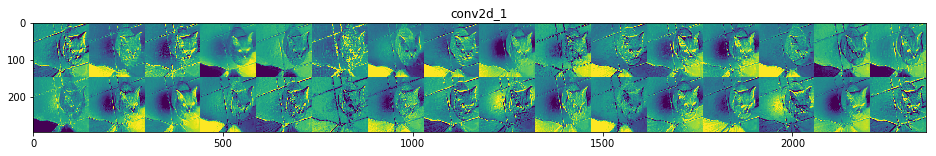

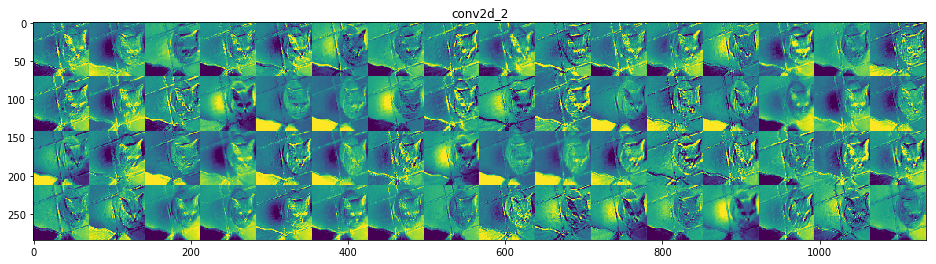

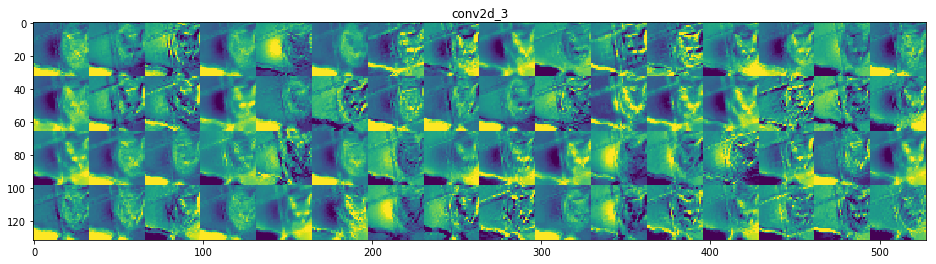

In [ ]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
zipped_layers = zip(layer_names, activations)
for layer_name, layer_activation in zipped_layers: #this loop     
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

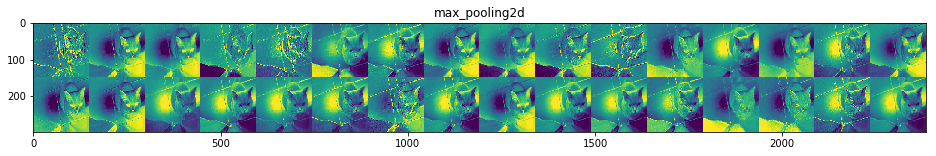

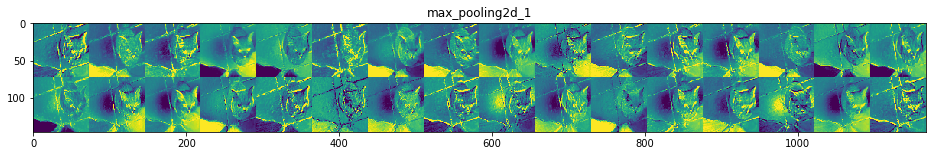

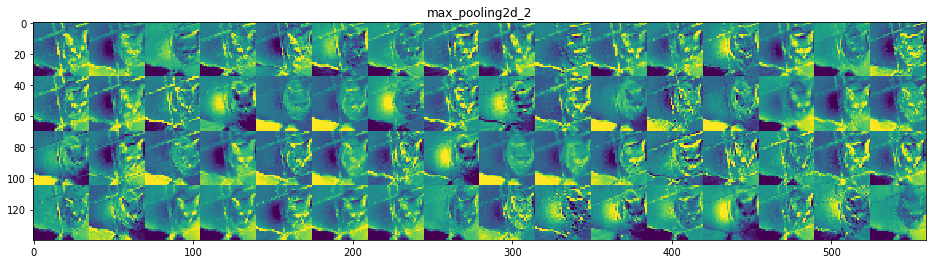

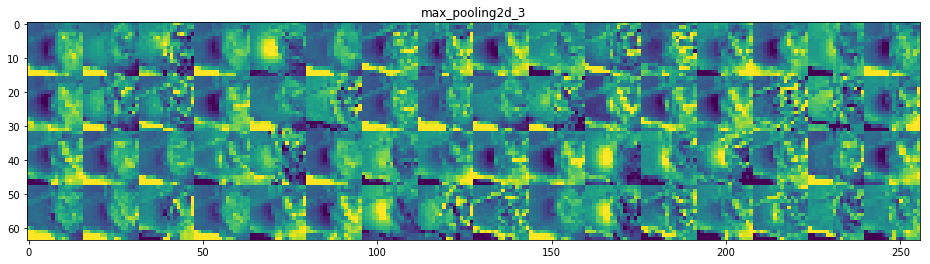

In [ ]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')